Topic	Contents

0. Architecture of a classification neural network	Neural networks can come in almost any shape or size, but they typically follow a similar floor plan.
1. Getting binary classification data ready	Data can be almost anything but to get started we're going to create a simple binary classification dataset.
2. Building a PyTorch classification model	Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop specific to classification.
3. Fitting the model to data (training)	We've got data and a model, now let's let the model (try to) find patterns in the (training) data.
4. Making predictions and evaluating a model (inference)	Our model's found patterns in the data, let's compare its findings to the actual (testing) data.
5. Improving a model (from a model perspective)	We've trained an evaluated a model but it's not working, let's try a few things to improve it.
6. Non-linearity	So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines?
7. Replicating non-linear functions	We used non-linear functions to help model non-linear data, but what do these look like?
8. Putting it all together with multi-class classification	Let's put everything we've done so far for binary classification together with a multi-class classification problem.

## 0. Architecture of a classification neural network
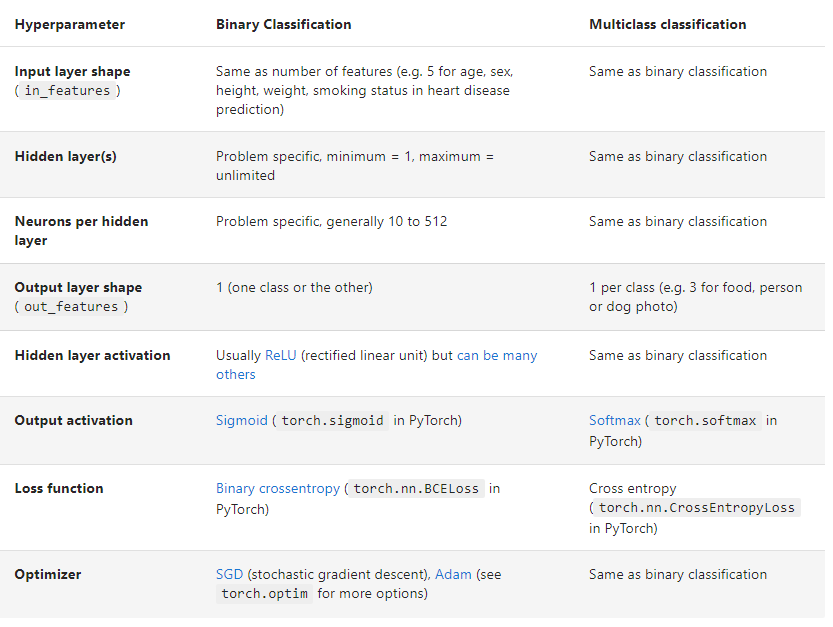

## 1. Make classification data and get it ready

In [23]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state=42)

In [24]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [25]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],  "X2": X[:, 1], "label":y
                        })

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [26]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

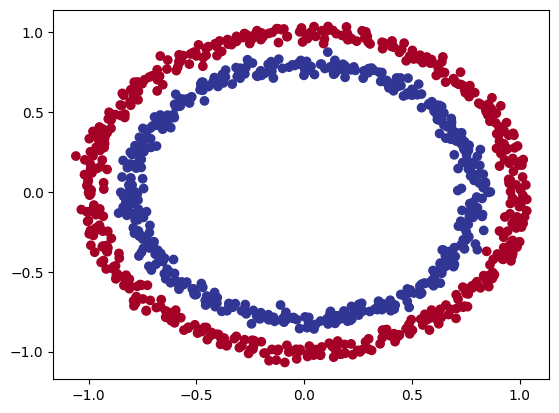

In [27]:
import matplotlib.pyplot as plt 
plt.scatter(x = X[:, 0], y=X[:, 1], c = y, cmap=plt.cm.RdYlBu)

The above is a famous problem which is called the toy dataset, which is to classify red and blue dots using the neural network

## 1.1 Input and Output shapes

- One of the most common errors in deep learning is shape erros.
- Mismatching the shapes of tensors and tensor operations with result in errors in models.
- What can be done?
     - Get familiar with the shape of the data that you're working with.
     - Always try checking the input and output shapes of the tensors.


In [28]:
X.shape, y.shape

((1000, 2), (1000,))

In [29]:
## We do have a shape mismatch in the above, 

In [30]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


## 1.2 Converting Data into Tensors and creating train and test splits

In [31]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))